# Orthogonal Matching Pursuit
- 희소 신호를 복원하기 위해 직교 일치 추적 알고리즘을 사용해 사전으로 인코딩된 노이즈 섞인 측정값으로부터 복원

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_sparse_coded_signal
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV

n_components, n_features = 512, 100
n_nonzero_coefs = 17

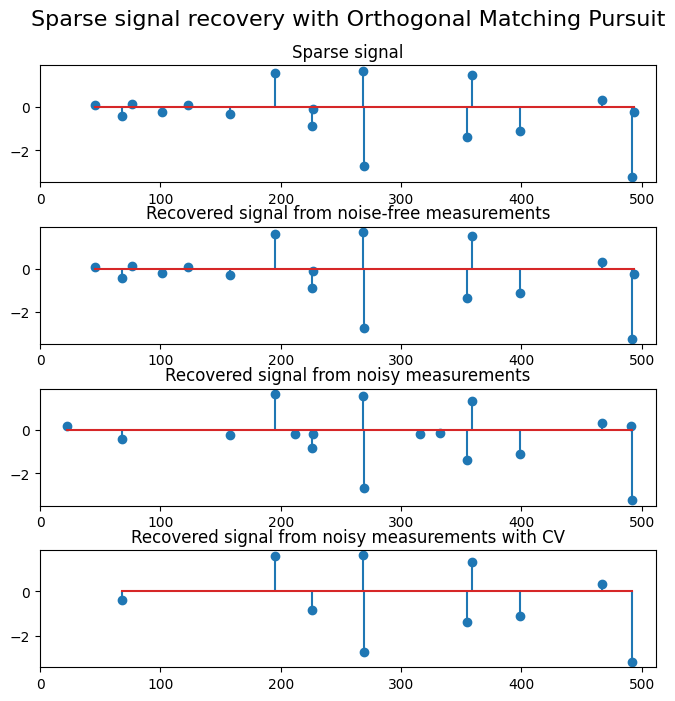

In [6]:
y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)
X = X.T

(idx,) = w.nonzero()

# 깨끗한 신호 왜곡
y_noisy = y + 0.05 * np.random.randn(len(y))

# 희소 신호 그래프로 표현
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# 노이즈 없는 복원 그래프 그리기
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# 노이즈 있는 복원 그래프 그리기
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# 교차 검증을 통해 희소 신호의 0이 아닌 요소 수를 설정하여 잡음이 있는 복원 그래프 그리기
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()